# 'WeRateDogs' - Wrangle and Analyze Data Project
## by Imesha Kuruppu

In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

## Gathering data

### Gathering twitter archive data from a given file 

In [2]:
# read the twitter archived data to a dataframe
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

### Gathering image prediction file from the udacity server

In [3]:
# Downloading image prediction file from the udacity server
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"  
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t')

### Gathering data from the Twitter API

In [336]:
# Connecting to the twitter api
consumer_key = ''
consumer_secret = ''
access_token = ''
access_token_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth,
                 parser = tweepy.parsers.JSONParser(),
                 wait_on_rate_limit = True,
                 wait_on_rate_limit_notify = True
                )

In [ ]:
# Reading data from the twitter api
tweets_list = []
missing_tweets = []

for tweet_id in twitter_archive['tweet_id']:
    try:
        tweets_list.append(api.get_status(tweet_id, tweet_mode='extended'))
    except Exception as e:
        missing_tweets.append(tweet_id)

Rate limit reached. Sleeping for: 733
Rate limit reached. Sleeping for: 732


In [ ]:
len(tweets_list), len(missing_tweets)

In [ ]:
# write tweet data to a file
with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(tweets_list, indent=4))

In [ ]:
# write missed tweet data to a file
with open('tweet_json_missed.txt', 'w') as file:
        file.write(json.dumps(missing_tweets, indent=4))

In [5]:
# Saving twiter data to a dataframe
df_list = []

with open('tweet_json.txt') as file:
    json_data = json.load(file)
    for line in json_data:
        tweet_id = line["id"]
        favorite_count = line['favorite_count']
        retweet_count = line['retweet_count']
        
        df_list.append({
            'tweet_id' : int(tweet_id),
            'favorite_count' : int(favorite_count), 
            'retweet_count' : int(retweet_count)
        })
        
df_tweet = pd.DataFrame(df_list, columns = ['tweet_id','favorite_count','retweet_count'])

In [7]:
# write twitter data to a file from the dataframe
df_tweet.to_csv('df_tweet.csv', index=False)

In [4]:
# read twitter data from the previously stored file
df_tweet = pd.read_csv('df_tweet.csv')

## Assessing data

### Visual assessment

In [5]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [7]:
df_tweet

,tweet_id,favorite_count,retweet_count
0,892420643555336193,34919,7327
1,892177421306343426,30238,5472
2,891815181378084864,22761,3620
3,891689557279858688,38189,7520
4,891327558926688256,36460,8083
5,891087950875897856,18397,2712
6,890971913173991426,10699,1752
7,890729181411237888,58809,16435
8,890609185150312448,25308,3761
9,890240255349198849,28889,6357


### Programatic assessment

In [8]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
160,860924035999428608,NaN,NaN,2017-05-06 18:27:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @tallylott: h*ckin adorable promposal. 13/1...,8.609145e+17,363890752.0,2017-05-06 17:49:42 +0000,https://twitter.com/tallylott/status/860914485...,13,10,None,None,None,None,None
2177,669037058363662336,NaN,NaN,2015-11-24 06:17:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have Pancho and Peaches. Pancho is a C...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669037058...,10,10,None,None,None,None,None
1587,686749460672679938,NaN,NaN,2016-01-12 03:20:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Strange pup here. Easily manipulated. Rather i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686749460...,8,10,None,None,None,None,None
1775,678021115718029313,NaN,NaN,2015-12-19 01:16:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Reese. He likes holding hands. 12/10 h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678021115...,12,10,Reese,None,None,None,None
992,748692773788876800,NaN,NaN,2016-07-01 01:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",That is Quizno. This is his beach. He does not...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748692773...,10,10,his,doggo,None,None,None


In [10]:
twitter_archive.shape

(2356, 17)

In [11]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

> timestamp should not be object type.

In [12]:
# Finding minimum and maximum timestamp
twitter_archive['timestamp'].min(), twitter_archive['timestamp'].max()

('2015-11-15 22:32:08 +0000', '2017-08-01 16:23:56 +0000')

> This data set doesn't contain data beyond 2017-08-01.

In [13]:
sum(twitter_archive.duplicated())

0

In [14]:
sum(twitter_archive['tweet_id'].duplicated())

0

> There is no duplicated rows in the dataset.

In [15]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


> It seems maximum values of 'rating_numerator' and 'rating_denominator' are outliers.

In [16]:
# finding denominator values and number of occurrences
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

> According to this rating system 10 should be the standard denominator. Other denominator values should be replaced by number 10.

In [17]:
# finding numerator values and number of occurrences
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

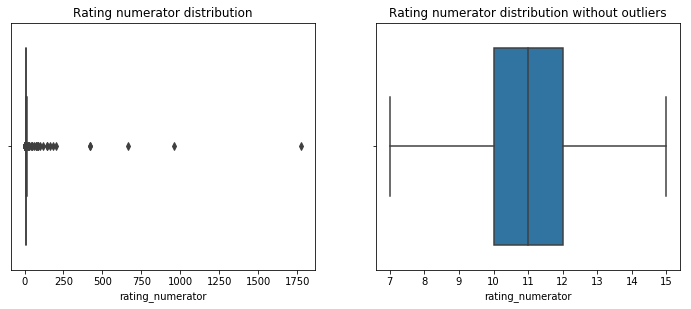

In [18]:
# plotting rating numerator values distribution to find outliers
plt.figure(figsize=(12,10))
plt.subplot(221)
plt.title('Rating numerator distribution')
sb.boxplot(twitter_archive['rating_numerator']);

plt.subplot(222)
plt.title('Rating numerator distribution without outliers')
sb.boxplot(twitter_archive['rating_numerator'], showfliers=False);

> Outliers in the rating_numerator should be removed.

In [19]:
# finding source values and number of occurrences
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
# finding unique values in each column
twitter_archive.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [21]:
twitter_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
twitter_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [23]:
twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [24]:
twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [25]:
# finding the number of rows without a proper dog stage value
df_dog_stage = twitter_archive.query('doggo=="None" & floofer=="None" & puppo=="None" & pupper=="None"')
df_dog_stage.shape

(1976, 17)

In [26]:
# finding dog names and their number of occurrences
twitter_archive.name.value_counts()

None           745
a               55
Charlie         12
Lucy            11
Oliver          11
Cooper          11
Penny           10
Tucker          10
Lola            10
Winston          9
Bo               9
Sadie            8
the              8
Bailey           7
Buddy            7
Toby             7
an               7
Daisy            7
Bella            6
Dave             6
Oscar            6
Leo              6
Rusty            6
Scout            6
Koda             6
Jax              6
Stanley          6
Milo             6
Jack             6
Louis            5
              ... 
Darla            1
Aqua             1
Enchilada        1
Caryl            1
Eriq             1
Dook             1
Wesley           1
Ralphé           1
Edgar            1
infuriating      1
Rhino            1
Barclay          1
Barry            1
Banjo            1
Amélie           1
Siba             1
Bronte           1
Philippe         1
space            1
Arnold           1
Margo            1
Cilantro    

> It seems some dog names are not meaningful

In [27]:
twitter_archive[twitter_archive.name == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,19607400.0,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,None,None,None,None,None
37,885167619883638784,NaN,NaN,2017-07-12 16:03:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/885167619...,13,10,None,None,None,None,None
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,None,None,None,None,None


In [28]:
name_df = twitter_archive[twitter_archive.name.str.len() == 1]
name_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/772581559...,10,10,a,None,None,None,None
1002,747885874273214464,NaN,NaN,2016-06-28 20:14:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a mighty rare blue-tailed hammer sherk...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747885874...,8,10,a,None,None,None,None
1004,747816857231626240,NaN,NaN,2016-06-28 15:40:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Viewer discretion is advised. This is a terrib...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/747816857...,4,10,a,None,None,None,None
1017,746872823977771008,NaN,NaN,2016-06-26 01:08:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a carrot. We only rate dogs. Please on...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746872823...,11,10,a,None,None,None,None
1049,743222593470234624,NaN,NaN,2016-06-15 23:24:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a very rare Great Alaskan Bush Pupper....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743222593...,12,10,a,None,None,pupper,None
1193,717537687239008257,NaN,NaN,2016-04-06 02:21:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",People please. This is a Deadly Mediterranean ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/717537687...,11,10,a,None,None,None,None
1207,715733265223708672,NaN,NaN,2016-04-01 02:51:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a taco. We only rate dogs. Please only...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/715733265...,10,10,a,None,None,None,None


In [29]:
# finding the number of dog names that have one letter
name_df.shape

(56, 17)

In [30]:
image_prediction.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [31]:
image_prediction.shape

(2075, 12)

In [32]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
sum(image_prediction.duplicated())

0

In [34]:
sum(image_prediction['jpg_url'].duplicated())

66

> There are no duplicated rows in the image_prediction dataset. But there are 66 duplicated image urls in the dataset.

In [35]:
# checking duplicated urls
image_prediction[image_prediction.duplicated(['jpg_url'])]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [36]:
image_prediction.query('jpg_url == "https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.25153,True,bath_towel,0.116806,False


In [37]:
# finding number of unique urls
image_prediction.jpg_url.nunique()

2009

In [38]:
# finding unique values in each column
image_prediction.nunique()

tweet_id    2075
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [39]:
image_prediction.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
web_site                      19
Cardigan                      19
Maltese_dog                   18
Shetland_sheepdog             18
teddy                         18
beagle                        18
Eskimo_dog                    18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
Italian_greyhound             16
kuvasz                        16
          

In [42]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [43]:
df_tweet.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,34919,7327
1,892177421306343426,30238,5472
2,891815181378084864,22761,3620
3,891689557279858688,38189,7520
4,891327558926688256,36460,8083


In [44]:
df_tweet.shape

(2331, 3)

In [45]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [46]:
sum(df_tweet.duplicated())

0

In [47]:
df_tweet.describe()

,tweet_id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7291.508795,2579.451308
std,6.823170e+16,11326.456106,4362.569362
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1262.000000,524.000000
50%,7.182469e+17,3159.000000,1203.000000
75%,7.986692e+17,8912.500000,2985.000000
max,8.924206e+17,150026.000000,74008.000000


### Quality Issues

- 'twitter_archive'  
1) Remove unnessassary columns(in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, source, text, expanded_urls) -> **Q1**     
2) Every row doesn't have a meaningful dog name (ex: single character for dog name(a, O)) -> **Q2**  
3) Data type of 'timestamp' and dog stages is not object type. -> **Q3**   
4) Rating_denominator should be 10, there are other numbers. -> **Q4**    
5) Rating_numerator column has outliers. These outliers need to remove. -> **Q5**    
6) Keep only records that have images. (twitter archive has 2356 records and image prediction has only 2075 records) -> **Q7**    
7) Capitalize the first letter of 'name', 'dog_stage' and 'prediction' column values.-> **Q8**    
8) Create a new column for dog_rating -> **Q9**  
  
  
- 'image_prediction'  
1) Remove unnessassary column(img_num) -> **Q1**  
2) Drop duplicated image urls(jpg_url) -> **Q6**  

### Tidiness Issues

- 'twitter_archive'  
1) There should be only one column for the dog stage (doggo, floofer, pupper and puppo columns should concatenate to one column) -> **T1**  
- 'image prediction'  
2) The dog breed prediction should give in one column (p1, p2,p3), The prediction confidence should give in one column (p1_conf, p2_conf, P3_conf) -> **T3**    
3) Columns in image_prediction should join to twitter_archive DataFrame -> **T2**  

- 'df_tweet'  
4) favorite_count and retweet_count columns should join with the twitter_archive DataFrame -> **T4**  

## Cleaning data

In [48]:
# Get the copies of all three dataframes
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
df_tweet_clean = df_tweet.copy()

#### Quality issue - 1 (Q1)
> Remove columns that are not needed for data analysis in twitter archive and image prediction. 

#### Define
> * Remove following columns from the twitter archive: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, source, text, expanded_urls  
* Remove the img_num column from the image prediction data frame. 

#### Code

In [49]:
twitter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp','source', 'text', 'expanded_urls'], axis=1, inplace=True)

In [50]:
image_prediction_clean.drop(['img_num'], axis=1, inplace=True)

#### Test

In [51]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(6)
memory usage: 165.7+ KB


In [52]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.8+ KB


#### Tidiness issue - 1 (T1)
> In the given dataset there are four columns to define one single variable dog stage. These columns should concatenate.
#### Define
> Concatenate doggo, floofer, pupper and puppo columns to a one column called dog_stage

#### Code

In [53]:
# finding the number of values in the dog stage columns before concatenation
twitter_archive_clean.doggo.value_counts(), twitter_archive_clean.floofer.value_counts(), twitter_archive_clean.pupper.value_counts(), twitter_archive_clean.puppo.value_counts()

(None     2259
 doggo      97
 Name: doggo, dtype: int64, None       2346
 floofer      10
 Name: floofer, dtype: int64, None      2099
 pupper     257
 Name: pupper, dtype: int64, None     2326
 puppo      30
 Name: puppo, dtype: int64)

In [54]:
twitter_archive_clean.shape

(2356, 9)

In [55]:
# concatenate the dog stage column
twitter_archive_clean = pd.melt(twitter_archive_clean, id_vars=['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator', 'name'],
                           var_name='stage_name', value_name='dog_stage')

In [56]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage_name,dog_stage
5435,782969140009107456,2016-10-03 15:42:44 +0000,12,10,Cali,pupper,None
6464,678969228704284672,2015-12-21 16:04:13 +0000,11,10,Lola,pupper,None
7722,791821351946420224,2016-10-28 01:58:16 +0000,13,10,None,puppo,None
2871,811386762094317568,2016-12-21 01:44:13 +0000,11,10,Craig,floofer,None
6779,671141549288370177,2015-11-30 01:39:49 +0000,9,10,None,pupper,None


In [57]:
twitter_archive_clean.query('tweet_id == 705786532653883392').sort_values('dog_stage')

,tweet_id,timestamp,rating_numerator,rating_denominator,name,stage_name,dog_stage
1330,705786532653883392,2016-03-04 16:06:36 +0000,11,10,None,doggo,None
3686,705786532653883392,2016-03-04 16:06:36 +0000,11,10,None,floofer,None
8398,705786532653883392,2016-03-04 16:06:36 +0000,11,10,None,puppo,None
6042,705786532653883392,2016-03-04 16:06:36 +0000,11,10,None,pupper,pupper


In [58]:
# drop the stage_name column
twitter_archive_clean = twitter_archive_clean.drop('stage_name', axis=1)

In [59]:
# remove duplicated rows and keep one row with correct dog stage
twitter_archive_clean = twitter_archive_clean.sort_values('dog_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')

#### Test

In [60]:
twitter_archive_clean.sample(2)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage
6519,676916996760600576,2015-12-16 00:09:23 +0000,10,10,None,pupper
3168,771136648247640064,2016-09-01 00:04:38 +0000,11,10,Dixie,None


In [61]:
twitter_archive_clean.shape

(2356, 6)

In [62]:
twitter_archive_clean['dog_stage'].value_counts()

None       1976
pupper      257
doggo        83
puppo        30
floofer      10
Name: dog_stage, dtype: int64

In [63]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 6 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stage             2356 non-null object
dtypes: int64(3), object(3)
memory usage: 128.8+ KB


#### Quality issure - 2 (Q2)
> Every row doesn't have a meaningful dog name.
#### Define
> Replace rows of the the twitter archive that have a single charactor as the dog name by the value 'None'.

#### Code

In [64]:
twitter_archive_clean.loc[twitter_archive_clean.name.str.len() == 1, 'name'] = 'None'

#### Test

In [65]:
twitter_archive_clean.shape

(2356, 6)

In [66]:
 twitter_archive_clean[twitter_archive_clean.name.str.len() == 1]

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage


In [67]:
twitter_archive_clean.name.value_counts()

None           801
Charlie         12
Oliver          11
Cooper          11
Lucy            11
Penny           10
Tucker          10
Lola            10
Winston          9
Bo               9
the              8
Sadie            8
an               7
Daisy            7
Toby             7
Buddy            7
Bailey           7
Bella            6
Jack             6
Milo             6
Oscar            6
Dave             6
Stanley          6
Scout            6
Leo              6
Jax              6
Koda             6
Rusty            6
Alfie            5
very             5
              ... 
Kial             1
Tuco             1
Darla            1
Aqua             1
Enchilada        1
Smiley           1
Arnold           1
Lulu             1
Kaia             1
Remus            1
infuriating      1
Rhino            1
Barclay          1
Barry            1
Banjo            1
Amélie           1
Siba             1
Bronte           1
Philippe         1
Bluebert         1
Jeffri           1
Edgar       

In [68]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage
2940,800141422401830912,2016-11-20 00:59:15 +0000,13,10,Peaches,None
4331,672997845381865473,2015-12-05 04:36:04 +0000,12,10,Kenzie,None
4248,674754018082705410,2015-12-10 00:54:28 +0000,12,10,None,None
6666,673656262056419329,2015-12-07 00:12:23 +0000,10,10,Albert,pupper
3870,691090071332753408,2016-01-24 02:48:07 +0000,12,10,None,None


#### Quality issue - 3 (Q3)
> Correct the data types in the twitter archive.
#### Define
> * Change the data type of the timestamp column to datetime from object type.  
* Change the data type of dog stage from object to category.

#### Code

In [69]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])

In [70]:
twitter_archive_clean['dog_stage']= twitter_archive_clean['dog_stage'].astype('category')

#### Test

In [71]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 6 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stage             2356 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(1)
memory usage: 112.9+ KB


#### Quality issue - 4 (Q4)
> According to the rating system all records should have rating_denominator equals to 10. But in the data set there are different numbers for denominator other than 10
#### Define
> Assign number 10 to all the rows that contain different number as the rating denominator.

#### Code

In [72]:
twitter_archive_clean.loc[twitter_archive_clean.rating_denominator != 10, 'rating_denominator'] = 10

#### Test

In [73]:
twitter_archive_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

In [74]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 2259 to 7236
Data columns (total 6 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
dog_stage             2356 non-null category
dtypes: category(1), datetime64[ns](1), int64(3), object(1)
memory usage: 112.9+ KB


#### Quality issue - 5 (Q5)
> Remove outliers from the rating_numerator column

#### Define
> Remove all rows that contain a value that greater than 100 as the rating numerator.

#### Code 

In [75]:
twitter_archive_clean.query('rating_numerator >= 100').shape

(11, 6)

In [76]:
twitter_archive_clean = twitter_archive_clean.loc[twitter_archive_clean.rating_numerator < 100]

#### Test

In [77]:
twitter_archive_clean.query('rating_numerator >= 100').shape

(0, 6)

In [78]:
twitter_archive_clean['rating_numerator'].value_counts()

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
3      19
4      17
2       9
1       9
75      2
0       2
15      2
24      1
20      1
99      1
26      1
44      1
50      1
60      1
84      1
88      1
17      1
27      1
45      1
80      1
Name: rating_numerator, dtype: int64

#### Quality issue - 6 (Q6)
> There are 66 duplicated URLs in the image prediction
#### Define
> Remove 66 duplicated URLs from the image prediction

#### Code

In [79]:
image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last', inplace=True)

#### Test

In [80]:
sum(image_prediction_clean.duplicated(['jpg_url']))

0

#### Tidiness issue - 2 (T2)
> Merge twitter archive and image prediction data frames
#### Define
>  Merge twitter archive and image prediction data frames

#### Code

In [81]:
list(twitter_archive_clean), list(image_prediction_clean)

(['tweet_id',
  'timestamp',
  'rating_numerator',
  'rating_denominator',
  'name',
  'dog_stage'],
 ['tweet_id',
  'jpg_url',
  'p1',
  'p1_conf',
  'p1_dog',
  'p2',
  'p2_conf',
  'p2_dog',
  'p3',
  'p3_conf',
  'p3_dog'])

In [82]:
twitter_archive_clean.shape, image_prediction_clean.shape

((2345, 6), (2009, 11))

In [83]:
sum(twitter_archive_clean.duplicated('tweet_id')), sum(image_prediction_clean.duplicated('tweet_id')) 

(0, 0)

In [84]:
# merging two data frames
df_twitter_data1 = pd.merge(twitter_archive_clean, image_prediction_clean, how = 'left', on = ['tweet_id'])

#### Test

In [85]:
df_twitter_data1.shape

(2345, 16)

In [86]:
df_twitter_data1.sample(2)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
295,701952816642965504,2016-02-23 02:12:47,11,10,Rilo,None,https://pbs.twimg.com/media/Cb3WXMUUMAIuzL8.jpg,toy_poodle,0.331707,True,miniature_poodle,0.272485,True,standard_poodle,0.169415,True
910,670679630144274432,2015-11-28 19:04:19,8,10,Pluto,None,https://pbs.twimg.com/media/CU67jGSUkAAk_1Y.jpg,Ibizan_hound,0.342734,True,Brittany_spaniel,0.229065,True,Chihuahua,0.104029,True


#### Quality issue - 7 (Q7)
> Every tweet id should contain a image url. Need to remove rows that don't contain 'jpg_url'.
#### Define
> Remove rows that don't contain 'jpg_url'.

#### Code

In [87]:
df_twitter_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2344
Data columns (total 16 columns):
tweet_id              2345 non-null int64
timestamp             2345 non-null datetime64[ns]
rating_numerator      2345 non-null int64
rating_denominator    2345 non-null int64
name                  2345 non-null object
dog_stage             2345 non-null category
jpg_url               2002 non-null object
p1                    2002 non-null object
p1_conf               2002 non-null float64
p1_dog                2002 non-null object
p2                    2002 non-null object
p2_conf               2002 non-null float64
p2_dog                2002 non-null object
p3                    2002 non-null object
p3_conf               2002 non-null float64
p3_dog                2002 non-null object
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 295.6+ KB


In [88]:
# select all the rows that contain 'jpg_url'
df_twitter_data1 = df_twitter_data1[df_twitter_data1['jpg_url'].notnull()]

#### Test

In [89]:
df_twitter_data1.shape

(2002, 16)

In [90]:
df_twitter_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2344
Data columns (total 16 columns):
tweet_id              2002 non-null int64
timestamp             2002 non-null datetime64[ns]
rating_numerator      2002 non-null int64
rating_denominator    2002 non-null int64
name                  2002 non-null object
dog_stage             2002 non-null category
jpg_url               2002 non-null object
p1                    2002 non-null object
p1_conf               2002 non-null float64
p1_dog                2002 non-null object
p2                    2002 non-null object
p2_conf               2002 non-null float64
p2_dog                2002 non-null object
p3                    2002 non-null object
p3_conf               2002 non-null float64
p3_dog                2002 non-null object
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 252.4+ KB


#### Tidiness issue - 3 (T3)
> Dog prediction columns(p1, p2,p3, p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog) should concatenate to three columns. 
#### Define
> The dog breed predictions((p1, p2,p3)) should give in one column (P) , The prediction confidences(p1_conf, p2_conf, P3_conf) should give in one column and  p1_dog, p2_dog, p3_dog should give in one column(p_dog)

#### Code

In [91]:
df_twitter_data1.sample(2)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2066,741743634094141440,2016-06-11 21:27:17,11,10,Aqua,pupper,https://pbs.twimg.com/media/Cksz42EW0AAh2NF.jpg,Labrador_retriever,0.786089,True,flat-coated_retriever,0.048652,True,Chesapeake_Bay_retriever,0.034693,True
289,698195409219559425,2016-02-12 17:22:12,9,10,Beau,None,https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg,Labrador_retriever,0.643690,True,American_Staffordshire_terrier,0.102684,True,dalmatian,0.050008,True


In [92]:
df_twitter_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2002 entries, 0 to 2344
Data columns (total 16 columns):
tweet_id              2002 non-null int64
timestamp             2002 non-null datetime64[ns]
rating_numerator      2002 non-null int64
rating_denominator    2002 non-null int64
name                  2002 non-null object
dog_stage             2002 non-null category
jpg_url               2002 non-null object
p1                    2002 non-null object
p1_conf               2002 non-null float64
p1_dog                2002 non-null object
p2                    2002 non-null object
p2_conf               2002 non-null float64
p2_dog                2002 non-null object
p3                    2002 non-null object
p3_conf               2002 non-null float64
p3_dog                2002 non-null object
dtypes: category(1), datetime64[ns](1), float64(3), int64(3), object(8)
memory usage: 252.4+ KB


In [93]:
df_twitter_data1.shape

(2002, 16)

In [94]:
# Cancatenate 'p1', 'p2', 'p3'
df_twitter_data_test1 = pd.melt(df_twitter_data1, id_vars=['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'jpg_url'], value_vars=['p1', 'p2', 'p3'],
                           var_name='prediction_attempt', value_name='prediction')

In [95]:
df_twitter_data_test1.sample()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction_attempt,prediction
3926,708845821941387268,2016-03-13 02:43:08,9,10,None,pupper,https://pbs.twimg.com/media/CdZTgynWwAATZcx.jpg,p2,kelpie


In [96]:
df_twitter_data_test1.shape

(6006, 9)

In [97]:
# Concatenate 'p1_conf', 'p2_conf', 'p3_conf'
df_twitter_data_test2 = pd.melt(df_twitter_data1, id_vars=['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'jpg_url'], value_vars=['p1_conf', 'p2_conf', 'p3_conf'],
                           var_name='prediction_attempt', value_name='p_conf')

In [98]:
df_twitter_data_test2.sample()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction_attempt,p_conf
587,714957620017307648,2016-03-29 23:29:14,10,10,Curtis,None,https://pbs.twimg.com/media/CewKKiOWwAIe3pR.jpg,p1_conf,0.251516


In [99]:
# Keep only first two charactors from the prediction_attempt column 
df_twitter_data_test2['prediction_attempt'] = df_twitter_data_test2['prediction_attempt'].str[:2]

In [100]:
df_twitter_data_test2.sample()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction_attempt,p_conf
4001,825026590719483904,2017-01-27 17:04:02,12,10,Pablo,puppo,https://pbs.twimg.com/media/C3MVTeHWcAAGNfx.jpg,p2,0.467678


In [101]:
# Concatenate 'p1_dog', 'p2_dog', 'p3_dog'
df_twitter_data_test3 = pd.melt(df_twitter_data1, id_vars=['tweet_id', 'timestamp', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'jpg_url'], value_vars=['p1_dog', 'p2_dog', 'p3_dog'],
                           var_name='prediction_attempt', value_name='p_dog')

In [102]:
df_twitter_data_test3.sample()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction_attempt,p_dog
192,880221127280381952,2017-06-29 00:27:25,12,10,Jesse,None,https://pbs.twimg.com/media/DDcscbXU0AIfDzs.jpg,p1_dog,True


In [103]:
# Keep only first two charactors from the prediction_attempt column 
df_twitter_data_test3['prediction_attempt'] = df_twitter_data_test3['prediction_attempt'].str[:2]

In [104]:
df_twitter_data_test2.sample()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction_attempt,p_conf
5366,832397543355072512,2017-02-17 01:13:34,12,10,Eevee,None,https://pbs.twimg.com/media/C41FIiAW8AA7lMr.jpg,p3,0.001126


In [105]:
# Merging data frames df_twitter_data_test1, df_twitter_data_test2
df_twitter_data1_merge = pd.merge(df_twitter_data_test1, df_twitter_data_test2,
                            on=['tweet_id','timestamp', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'prediction_attempt'], how='left')

In [106]:
df_twitter_data1_merge.sample()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction_attempt,prediction,p_conf
4694,673688752737402881,2015-12-07 02:21:29,9,10,Larry,None,https://pbs.twimg.com/media/CVlsVs3WIAAja6m.jpg,p3,kuvasz,0.203495


In [107]:
# Merging data frames df_twitter_data1_merge, df_twitter_data_test3
df_twitter_data1 = pd.merge(df_twitter_data1_merge, df_twitter_data_test3,
                            on=['tweet_id','timestamp', 'rating_numerator', 'rating_denominator', 'name', 'dog_stage', 'jpg_url', 'prediction_attempt'], how='left')

In [108]:
df_twitter_data1.sample()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction_attempt,prediction,p_conf,p_dog
5858,807621403335917568,2016-12-10 16:22:02,14,10,Ollie,pupper,https://pbs.twimg.com/media/CzU_YVGUUAA3Xsd.jpg,p3,chow,0.020408,True


#### Test

In [109]:
df_twitter_data1.sample(5)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction_attempt,prediction,p_conf,p_dog
4792,668623201287675904,2015-11-23 02:52:48,10,10,Jomathan,None,https://pbs.twimg.com/media/CUdtP1xUYAIeBnE.jpg,p3,titi,0.067325,False
2083,668221241640230912,2015-11-22 00:15:33,10,10,None,None,https://pbs.twimg.com/media/CUX_rAyWsAYZOQ5.jpg,p2,golden_retriever,0.372115,True
453,718939241951195136,2016-04-09 23:10:47,12,10,Otis,None,https://pbs.twimg.com/media/CfovbK4WIAAkTn3.jpg,p1,Pembroke,0.766327,True
279,703425003149250560,2016-02-27 03:42:44,9,10,None,None,https://pbs.twimg.com/media/CcMRSwUW8AAxxNC.jpg,p1,miniature_pinscher,0.292866,True
2429,726224900189511680,2016-04-30 01:41:23,9,10,None,None,https://pbs.twimg.com/media/ChQRsYaW0AETD7z.jpg,p2,cocker_spaniel,0.094785,True


In [110]:
df_twitter_data1.shape

(6006, 11)

In [111]:
df_twitter_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6006 entries, 0 to 6005
Data columns (total 11 columns):
tweet_id              6006 non-null int64
timestamp             6006 non-null datetime64[ns]
rating_numerator      6006 non-null int64
rating_denominator    6006 non-null int64
name                  6006 non-null object
dog_stage             6006 non-null category
jpg_url               6006 non-null object
prediction_attempt    6006 non-null object
prediction            6006 non-null object
p_conf                6006 non-null float64
p_dog                 6006 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 522.2+ KB


#### Tidiness issue - 4
>Merge df_tweet_clean and df_twitter_data1 data frames
#### Define
> Merge df_tweet_clean and df_twitter_data1 data frames

#### Code

In [112]:
# Merging two data frames
df_twitter_data = pd.merge(df_twitter_data1, df_tweet_clean, on=['tweet_id'], how='inner')

#### Test

In [113]:
df_twitter_data.sample()

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction_attempt,prediction,p_conf,p_dog,favorite_count,retweet_count
1554,707014260413456384,2016-03-08 01:25:10,11,10,Ellie,None,https://pbs.twimg.com/media/Cc_RsVlXEAIzzlX.jpg,p1,Chihuahua,0.58378,True,2217,569


In [114]:
df_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961 entries, 0 to 5960
Data columns (total 13 columns):
tweet_id              5961 non-null int64
timestamp             5961 non-null datetime64[ns]
rating_numerator      5961 non-null int64
rating_denominator    5961 non-null int64
name                  5961 non-null object
dog_stage             5961 non-null category
jpg_url               5961 non-null object
prediction_attempt    5961 non-null object
prediction            5961 non-null object
p_conf                5961 non-null float64
p_dog                 5961 non-null object
favorite_count        5961 non-null int64
retweet_count         5961 non-null int64
dtypes: category(1), datetime64[ns](1), float64(1), int64(5), object(5)
memory usage: 611.4+ KB


#### Quality issue - 8 (Q8)
> Capitalize the first letter of values in the columns name, dog_stage, prediction

#### Define
> Capitalize the first letter of values in the columns name, dog_stage, prediction

#### Code

In [115]:
df_twitter_data['name'] = df_twitter_data['name'].str.capitalize()

In [116]:
df_twitter_data['dog_stage'] = df_twitter_data['dog_stage'].str.capitalize()

In [117]:
df_twitter_data['prediction'] = df_twitter_data['prediction'].str.capitalize()

#### Test

In [118]:
df_twitter_data.sample(3)

,tweet_id,timestamp,rating_numerator,rating_denominator,name,dog_stage,jpg_url,prediction_attempt,prediction,p_conf,p_dog,favorite_count,retweet_count
4398,750101899009982464,2016-07-04 23:00:03,11,10,Lilah,None,https://pbs.twimg.com/media/Cmjlsh1XgAEvhq_.jpg,p1,Golden_retriever,0.316704,True,2941,809
4575,758740312047005698,2016-07-28 19:06:01,12,10,Boston,None,https://pbs.twimg.com/media/CoeWSJcUIAAv3Bq.jpg,p1,Chesapeake_bay_retriever,0.848514,True,5567,1559
2038,671520732782923777,2015-12-01 02:46:33,10,10,Alejandro,None,https://pbs.twimg.com/media/CVG4i9UWEAAUH3U.jpg,p2,Pekinese,0.135262,True,1288,486


#### Quality issue - 9 (Q9)
> For the easiness of the data analysis create a new column called dog_rating.

#### Define
> create the new column dog_rating by dividing the rating_numerator by rating_denominator and delete those two columns.

#### Code

In [119]:
# For analysis purpose creating a new column called 'rating'
df_twitter_data['dog_rating'] = df_twitter_data.rating_numerator / df_twitter_data.rating_denominator

In [120]:
# deleting two columns 'rating_numerator' and 'rating_denominator'
df_twitter_data.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [121]:
df_twitter_data.sample(2)

,tweet_id,timestamp,name,dog_stage,jpg_url,prediction_attempt,prediction,p_conf,p_dog,favorite_count,retweet_count,dog_rating
1050,685315239903100929,2016-01-08 04:21:00,None,None,https://pbs.twimg.com/media/CYK6kf0WMAAzP-0.jpg,p1,Chow,0.470162,True,3145,990,1.1
4004,861005113778896900,2017-05-06 23:49:50,Burt,None,https://pbs.twimg.com/media/C_LnlF5VoAEsL1K.jpg,p3,Muzzle,0.075764,False,15491,3463,1.2


In [122]:
df_twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5961 entries, 0 to 5960
Data columns (total 12 columns):
tweet_id              5961 non-null int64
timestamp             5961 non-null datetime64[ns]
name                  5961 non-null object
dog_stage             5961 non-null object
jpg_url               5961 non-null object
prediction_attempt    5961 non-null object
prediction            5961 non-null object
p_conf                5961 non-null float64
p_dog                 5961 non-null object
favorite_count        5961 non-null int64
retweet_count         5961 non-null int64
dog_rating            5961 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 605.4+ KB


## Storing data

In [123]:
# saving all clean dataset to a file called 'twitter_archive_master.csv'
df_twitter_data.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing data

In [124]:
# reading cleaned data set to a dataframe from the file
df_twitter_data = pd.read_csv('twitter_archive_master.csv')

In [125]:
df_twitter_data.sample(5)

,tweet_id,timestamp,name,dog_stage,jpg_url,prediction_attempt,prediction,p_conf,p_dog,favorite_count,retweet_count,dog_rating
1649,706593038911545345,2016-03-06 21:31:22,None,None,https://pbs.twimg.com/media/Cc5Snc7XIAAMidF.jpg,p3,Pillow,0.029409,False,2070,602,1.0
2320,668826086256599040,2015-11-23 16:18:59,Banditt,None,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,p2,Irish_terrier,0.153700,True,395,122,1.0
1064,688116655151435777,2016-01-15 21:52:49,None,None,https://pbs.twimg.com/media/CYyucekVAAESj8K.jpg,p3,Staffordshire_bullterrier,0.006864,True,2709,736,1.0
4692,754482103782404096,2016-07-17 01:05:25,Milo,None,https://pbs.twimg.com/ext_tw_video_thumb/75448...,p1,Tub,0.596796,False,5117,1877,1.0
1553,707387676719185920,2016-03-09 02:08:59,Clarkus,None,https://pbs.twimg.com/media/CdElVm7XEAADP6o.jpg,p3,Toy_terrier,0.015938,True,3346,1209,1.0


In [126]:
df_twitter_data.query('tweet_id == 667171260800061440')

,tweet_id,timestamp,name,dog_stage,jpg_url,prediction_attempt,prediction,p_conf,p_dog,favorite_count,retweet_count,dog_rating
195,667171260800061440,2015-11-19 02:43:18,Kenneth,None,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,p1,Giant_schnauzer,0.841265,True,200,74,1.0
196,667171260800061440,2015-11-19 02:43:18,Kenneth,None,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,p2,Lakeland_terrier,0.052744,True,200,74,1.0
197,667171260800061440,2015-11-19 02:43:18,Kenneth,None,https://pbs.twimg.com/media/CUJEuRIXIAAPDLt.jpg,p3,Irish_water_spaniel,0.034402,True,200,74,1.0


In [127]:
df_twitter_data.query('tweet_id == 676215927814406144')

,tweet_id,timestamp,name,dog_stage,jpg_url,prediction_attempt,prediction,p_conf,p_dog,favorite_count,retweet_count,dog_rating
3234,676215927814406144,2015-12-14 01:43:35,Herm,None,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,p1,Hamster,0.999484,False,1631,535,0.9
3235,676215927814406144,2015-12-14 01:43:35,Herm,None,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,p2,Guinea_pig,0.000158,False,1631,535,0.9
3236,676215927814406144,2015-12-14 01:43:35,Herm,None,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,p3,Broccoli,0.000061,False,1631,535,0.9


In [128]:
df_twitter_data.describe()

,tweet_id,p_conf,favorite_count,retweet_count,dog_rating
count,5.961000e+03,5.961000e+03,5961.000000,5961.000000,5961.000000
mean,7.372311e+17,2.631254e-01,7178.380976,2265.152994,1.082285
std,6.791703e+16,2.912342e-01,10865.290741,3927.457581,0.473947
min,6.660209e+17,1.740170e-10,0.000000,11.000000,0.000000
25%,6.758916e+17,5.109370e-02,1396.000000,514.000000,1.000000
50%,7.095662e+17,1.349830e-01,3241.000000,1106.000000,1.100000
75%,7.929134e+17,3.790550e-01,8668.000000,2629.000000,1.200000
max,8.924206e+17,1.000000e+00,150026.000000,74008.000000,9.900000


### 1) Most popular (top 10) dog breeds

In [131]:
df_twitter_data.query('prediction_attempt == "p1" & p_dog == True')['prediction'].value_counts().sort_values(ascending=False).head(10)

Golden_retriever      138
Labrador_retriever     91
Pembroke               87
Chihuahua              77
Pug                    55
Chow                   41
Samoyed                39
Pomeranian             38
Toy_poodle             37
Malamute               29
Name: prediction, dtype: int64

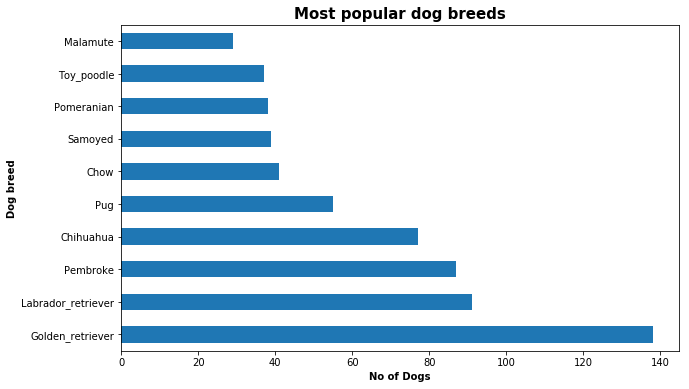

In [132]:
plt.figure(figsize=[10, 6])
df_twitter_data.query('prediction_attempt == "p1" & p_dog == True')['prediction'].value_counts().sort_values(ascending=False).head(10).plot(kind='barh', color = sb.color_palette()[0]);
plt.title('Most popular dog breeds', fontsize=15, fontweight='bold')
plt.xlabel('No of Dogs',fontsize=10, fontweight='bold')
plt.ylabel('Dog breed',fontsize=10, fontweight='bold')
plt.show();

> Most popular dog breed is 'Golden retriever'. Top five dog breeds are 'Golden retriever', 'Labrador_retriever', 'Pembroke', 'Chihuahua' and 'Pug'

### 2) Which dog breed has the highest ratings?

In [134]:
df_twitter_prediction1 = df_twitter_data.query('prediction_attempt == "p1" & p_dog == True')

In [135]:
df_twitter_prediction1.groupby(['prediction'])['dog_rating'].mean().sort_values(ascending=False).head(10)

prediction
Clumber                        2.700000
Soft-coated_wheaten_terrier    1.590000
West_highland_white_terrier    1.564286
Great_pyrenees                 1.492857
Borzoi                         1.444444
Siberian_husky                 1.325000
Pomeranian                     1.286842
Saluki                         1.250000
Briard                         1.233333
Labrador_retriever             1.230769
Name: dog_rating, dtype: float64

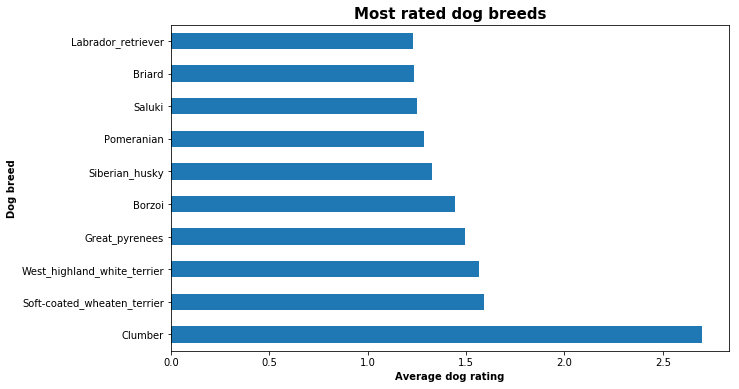

In [136]:
plt.figure(figsize=[10, 6])
df_twitter_prediction1.groupby(['prediction'])['dog_rating'].mean().sort_values(ascending=False).head(10).plot(kind='barh', color = sb.color_palette()[0]);
plt.title('Most rated dog breeds', fontsize=15, fontweight='bold')
plt.xlabel('Average dog rating',fontsize=10, fontweight='bold')
plt.ylabel('Dog breed',fontsize=10, fontweight='bold')
plt.show();

> Highest dog ratings was gained by the 'Clumber' dog breed.

### 3) Which dog breed has the highest favorite counts?

In [140]:
df_twitter_prediction1.groupby(['prediction'])['favorite_count'].mean().sort_values(ascending=False).head(10)

prediction
Saluki                     21492.000000
French_bulldog             16886.720000
Black-and-tan_coonhound    15116.000000
Flat-coated_retriever      14986.750000
Irish_water_spaniel        14447.000000
English_springer           13203.555556
Leonberg                   13097.000000
Eskimo_dog                 13059.111111
Basset                     12317.384615
Border_terrier             12056.571429
Name: favorite_count, dtype: float64

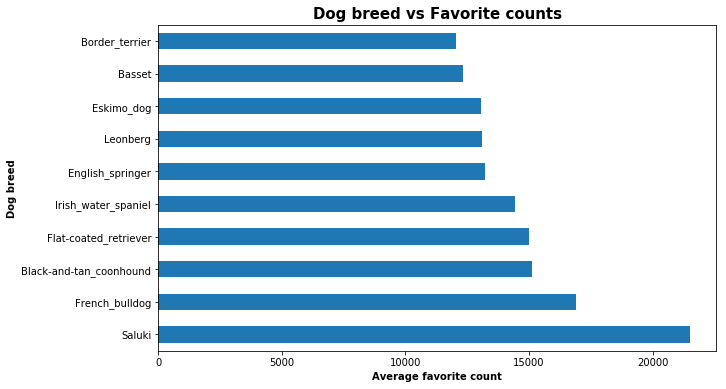

In [143]:
plt.figure(figsize=[10, 6])
df_twitter_prediction1.groupby(['prediction'])['favorite_count'].mean().sort_values(ascending=False).head(10).plot(kind='barh', color = sb.color_palette()[0]);
plt.title('Dog breed vs Favorite counts', fontsize=15, fontweight='bold')
plt.xlabel('Average favorite count',fontsize=10, fontweight='bold')
plt.ylabel('Dog breed',fontsize=10, fontweight='bold')
plt.show();

> Highest favorite counts was gained by the 'Saluki' dog breed.

> According to the above three results, we can see that most popular dog breed (Golden retriever), highest rated dog breed(Clumber) and dog breed (Saluki) that received highest favorite counts are different to each other.

### 4) Is there a relationship between favorite count, retweets and dog rating?

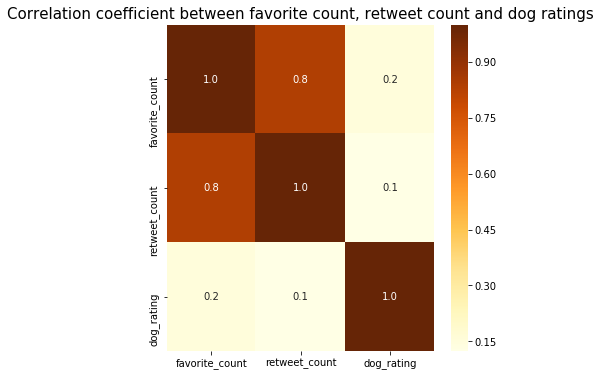

In [142]:
plt.figure(figsize=(6,6))
sb.heatmap(df_twitter_data[['favorite_count', 'retweet_count', 'dog_rating']].corr(), annot=True, cmap='YlOrBr', fmt='.1f')
plt.title("Correlation coefficient between favorite count, retweet count and dog ratings", fontsize=15);

> There is a positive correlation between the favorite count and retweet count as the corelation coefficient between them is 0.84(value close to 1). That means when favorite count is increasing for a image retweet count also increases. 

### 5) Most popular dog names

In [194]:
df_twitter_data['name'].value_counts().head(11)

None       1821
Cooper       30
Charlie      30
Oliver       30
Lucy         27
Penny        27
Tucker       27
Sadie        24
Winston      24
Lola         21
Daisy        21
Name: name, dtype: int64

> Most popular dog names are Cooper, Charlie, Oliver, Lucy, Penny, Tucker, Sadie, Winston, Lola and Daisy.